In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

import theano.tensor as tt
import pymc3 as pm

import exoplanet as xo
from specgp.terms import KronTerm
from specgp.means import KronMean
from specgp.distributions import MvUniform

In [9]:
t = np.linspace(-1, 1, 1000)
orbit = xo.orbits.KeplerianOrbit(period=5.0)
u = [0.3, 0.2]
planet = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.009, t=t, texp=0.02)
    .eval()
) * 1e3
moon = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.002, t=t+0.25, texp=0.02)
    .eval()
) * 1e3

/Users/tgordon/Library/Python/3.7/lib/python/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


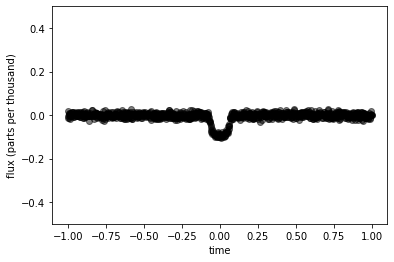

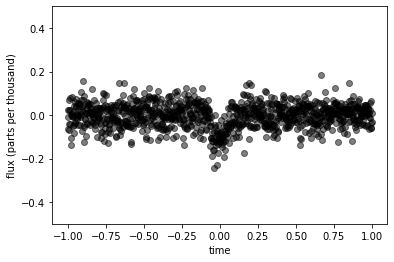

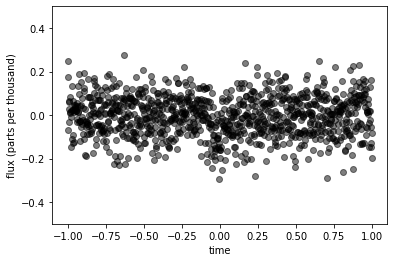

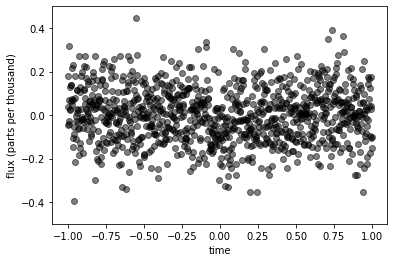

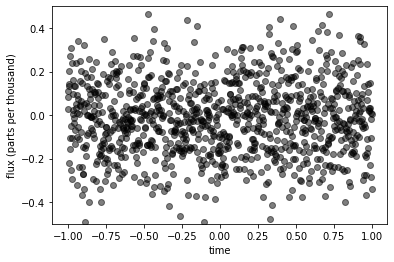

In [31]:
for i in range(1, 20, 4):
    pl.figure()
    pl.plot(t, planet + 0.01*i*np.random.randn(len(t), 1), 'ko', alpha=0.5)
    pl.xlabel('time')
    pl.ylabel('flux (parts per thousand)')
    pl.ylim(-0.5, 0.5)
    pl.savefig('/Users/tgordon/Desktop/transit_{0}.png'.format(i))

In [32]:
from astropy.io import fits
from astropy.time import Time

blue = fits.open('soho/blue.fits')
green = fits.open('soho/green.fits')
red = fits.open('soho/red.fits')
rgb = red, green, blue

rgb = [f[0].data for f in rgb]
mask = np.all([np.isfinite(f) for f in rgb], axis=0)

start = blue[0].header['DATES'][0:9]
end = blue[0].header['DATES'][14:]
start, end = Time([start, end]).jd
t = np.linspace(start, end, np.shape(rgb)[1]) - start

t = t[mask]
rgb = [f[mask].astype('float64') for f in rgb]
flux = np.sum(rgb, axis=0)/np.shape(rgb)[0]

# choose an arbitrary starting index and number of points to 
# select a segment of the (very large) SOHO timeseries 
i = 98765
n = 1000
t = t[i:i+n] - np.mean(t[i:i+n])
# in units of parts per thousand 
rgb = [f[i:i+n]/1e3 for f in rgb]

# add artificial white noise to the SOHO data in order 
# to make the model numerically stable.
rgb += np.random.randn(3, n) * np.exp(-4)

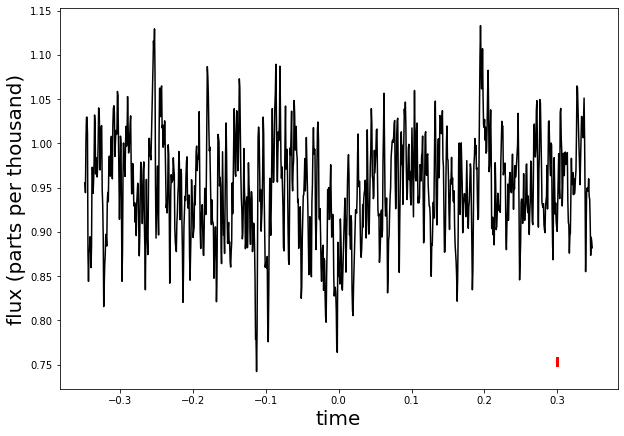

In [59]:
pl.figure(figsize=(10, 7))
pl.plot(t, (np.mean(rgb, axis=0)+1 + planet.T).T, '-', color='k')
pl.xlabel('time', fontsize=20)
pl.plot((0.3, 0.3), (0.75, 0.757), color='r', linewidth=3)
pl.ylabel('flux (parts per thousand)', fontsize=20)
pl.savefig('/Users/tgordon/Desktop/soho.png')

### np.mean(rgb, axis=0)+1 + planet.T

In [46]:
np.exp(-5)

0.006737946999085467